In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.test.num_examples

10000

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mnist.train.images.shape

(55000, 784)

In [10]:
single_img = mnist.train.images[1].reshape(28,28)

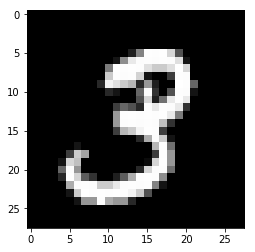

In [12]:
plt.imshow(single_img,cmap='gist_gray')

In [13]:
single_img.min()

0.0

In [14]:
single_img.max()

1.0

#### Placeholders

In [16]:
x = tf.placeholder(tf.float32,shape=[None,784])

#### Variables

In [17]:
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#### Graph Operations

In [20]:
y = tf.matmul(x,w) + b

#### Loss Functions

In [18]:
y_true = tf.placeholder(tf.float32,[None,10])

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

#### Optimizer

In [22]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = opt.minimize(cross_entropy)

#### Create Session

In [23]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
        
    correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
    
    print('Accuracy = {}'.format(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})))

Accuracy = 0.9187999963760376
